# Feature Engineering and Polynomial Regresison

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_temp = np.arange(0, 20, 1)    # array([ 0,  1,  2,  3, ..., 19]), it fakes a linear features distrubution
y_train = 1 + x_temp**2  # fakes a quadratic distribution of targets over x (as a 20 x 1 matrix, not a vector)
X_train = x_temp.reshape(-1,1)     # a 20 x 1 matrix MATRIX
X_train.shape, y_train.shape

((20, 1), (20,))

In [3]:
from mlutils import compute_gradient_matrix

In [4]:
# reshape(1, -1) instead of (-1, 1) since the dot product between matrices is only possible if A is mxn and B is nxo
# compute_gradient_matrix(X_train, y_train, np.zeros(len(X_train)).reshape(1, -1), 1)

In [5]:
from mlutils import gradient_descent_matrix

In [6]:
optimal_w, optimal_b = gradient_descent_matrix(X_train, y_train, a=1e-2, n_iter=1000) ;

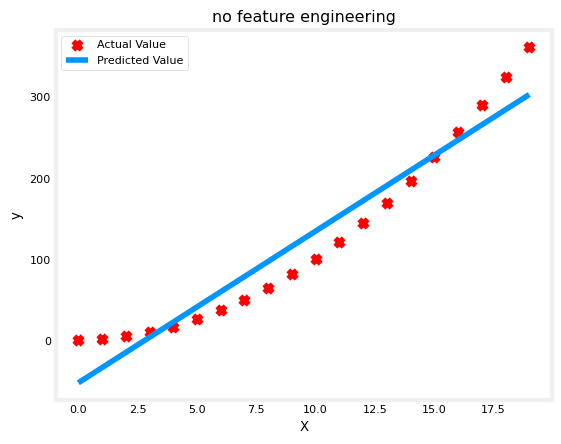

In [7]:
plt.scatter(x_temp, y_train, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(X_train, X_train@optimal_w + optimal_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [45]:
# Let's use a quadratic features distribution as a hypothesis
x = np.arange(0, 20, 1)

# This still fakes a quadratic target distribution
y = x**2


X = x**2
X = X.reshape(-1, 1)
X_train.shape, y_train.shape

((20, 1), (20,))

In [9]:
optimal_w, optimal_b = gradient_descent_matrix(X, y, a=1e-5, n_iter=10000) ;

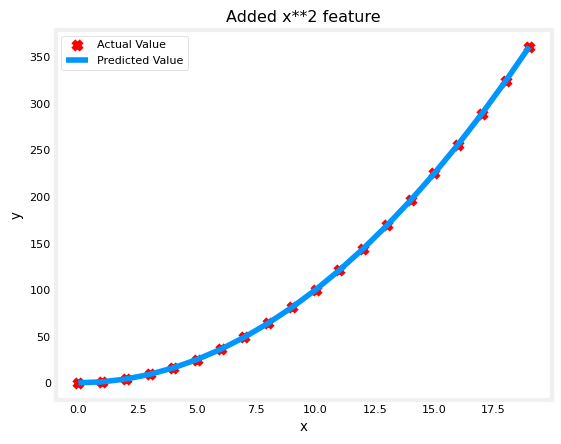

In [10]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,optimal_w) + optimal_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

### Discarding redundant features

In [11]:
x = np.arange(0, 20, 1)
y = 1 + x**2      # quadratic target data distribution, we pretend we don't know yet

# overengineered features: 
X = np.c_[x, x**2, x**3]   # concatenation along the 2nd axis (adds features and their values)
# Now we have y^ = w1x1 + w1x2^2 + w3x3^3 + b

# get the best values of w's and b
optimal_w, optimal_b = gradient_descent_matrix(X, y, a=1e-7, n_iter=10000)

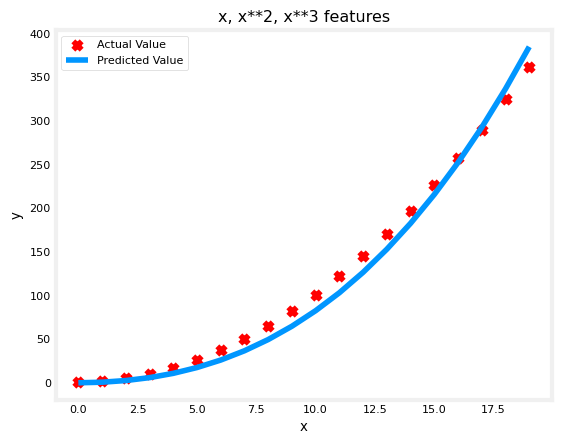

In [12]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@optimal_w + optimal_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [13]:
# Good but not perfect fit. Inspect w and b
optimal_w, optimal_b

(array([0.08447334, 0.54608322, 0.02711841]), np.float64(0.011039016941710575))

* w[0] is 0.08, a very weak contribution to the prediction
* w[1] is 0.53, it contributes a lot
* w[2] is 0.02, same as w[0]
* b is 0.01


## Feature scaling
Since x**3 may bring up really big numbers (whatever their sign is) we need to normalize.

In [46]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]

In [47]:
print(f'Peak to peak for features x before normalization: {np.ptp(X, axis=0)}')

Peak to peak for features x before normalization: [  19  361 6859]


In [52]:
from mlutils import z_normalize

X, _, _ = z_normalize(X)

In [51]:
print(f'Peak to peak for features x after normalization: {np.ptp(X, axis=0)}')

Peak to peak for features x after normalization: [3.29501788 3.18076489 3.28307153]


In [53]:
optimal_w, optimal_b = gradient_descent_matrix(X, y, a=1e-1, n_iter=100000) ;

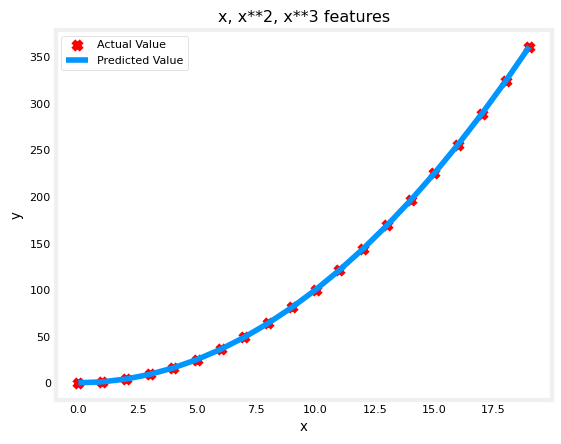

In [54]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@optimal_w + optimal_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()